In [1]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_X, train_y),(test_X, test_y) =  cifar10.load_data()

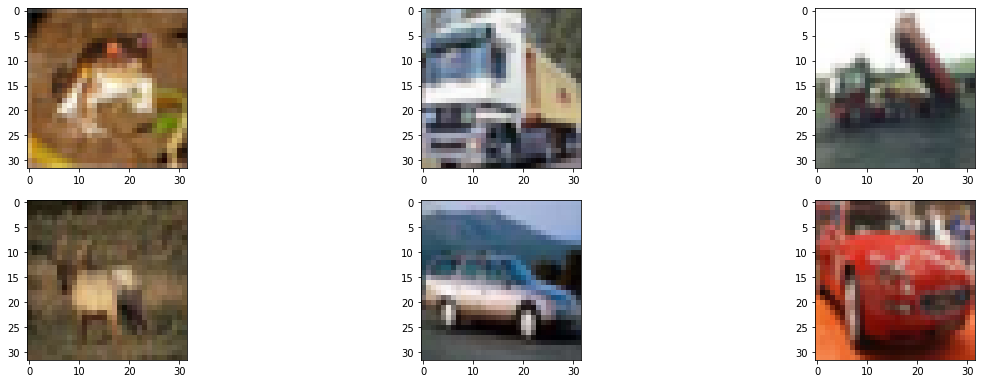

In [2]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.constraints import MaxNorm

In [4]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X/255
test_X = test_X/255

In [5]:
train_y= to_categorical(train_y)
test_y= to_categorical(test_y)
 
num_classes=test_y.shape[1]

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [10]:
model.fit(train_X,train_y,
    validation_data=(test_X,test_y),
    epochs=10,batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 302s 6ms/sample - loss: 1.6759 - accuracy: 0.3932 - val_loss: 1.3424 - val_accuracy: 0.5147
Epoch 2/10
50000/50000 [==============================] - 300s 6ms/sample - loss: 1.3063 - accuracy: 0.5318 - val_loss: 1.1606 - val_accuracy: 0.5893
Epoch 3/10
50000/50000 [==============================] - 298s 6ms/sample - loss: 1.1375 - accuracy: 0.5983 - val_loss: 1.0598 - val_accuracy: 0.6180
Epoch 4/10
50000/50000 [==============================] - 307s 6ms/sample - loss: 1.0118 - accuracy: 0.6410 - val_loss: 0.9989 - val_accuracy: 0.6450
Epoch 5/10
50000/50000 [==============================] - 301s 6ms/sample - loss: 0.9160 - accuracy: 0.6753 - val_loss: 0.9767 - val_accuracy: 0.6513
Epoch 6/10
50000/50000 [==============================] - 306s 6ms/sample - loss: 0.8239 - accuracy: 0.7091 - val_loss: 0.9348 - val_accuracy: 0.6681
Epoch 7/10
50000/50000 [==========================

In [11]:
_,acc=model.evaluate(test_X,test_y)
print(acc*100)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

69.17999982833862


In [12]:
model.save("model1_cifar_10epoch.h5")